In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#rources:
#https://www.kaggle.com/c/ieee-fraud-detection/discussion/107697#latest-628843
#https://www.kaggle.com/c/ieee-fraud-detection/discussion/99987

In [2]:
train_id=pd.read_csv("../data/train_identity.csv")
train_trans=pd.read_csv("../data/train_transaction.csv")

In [3]:
train_id.shape

(144233, 41)

In [4]:
train_trans.shape

(590540, 394)

In [5]:
full_df = pd.merge(train_trans,train_id, on='TransactionID', how='left')

In [6]:
full_df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [7]:
len(full_df[full_df["isFraud"]==1])/len(full_df)*100

3.4990009144173126

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

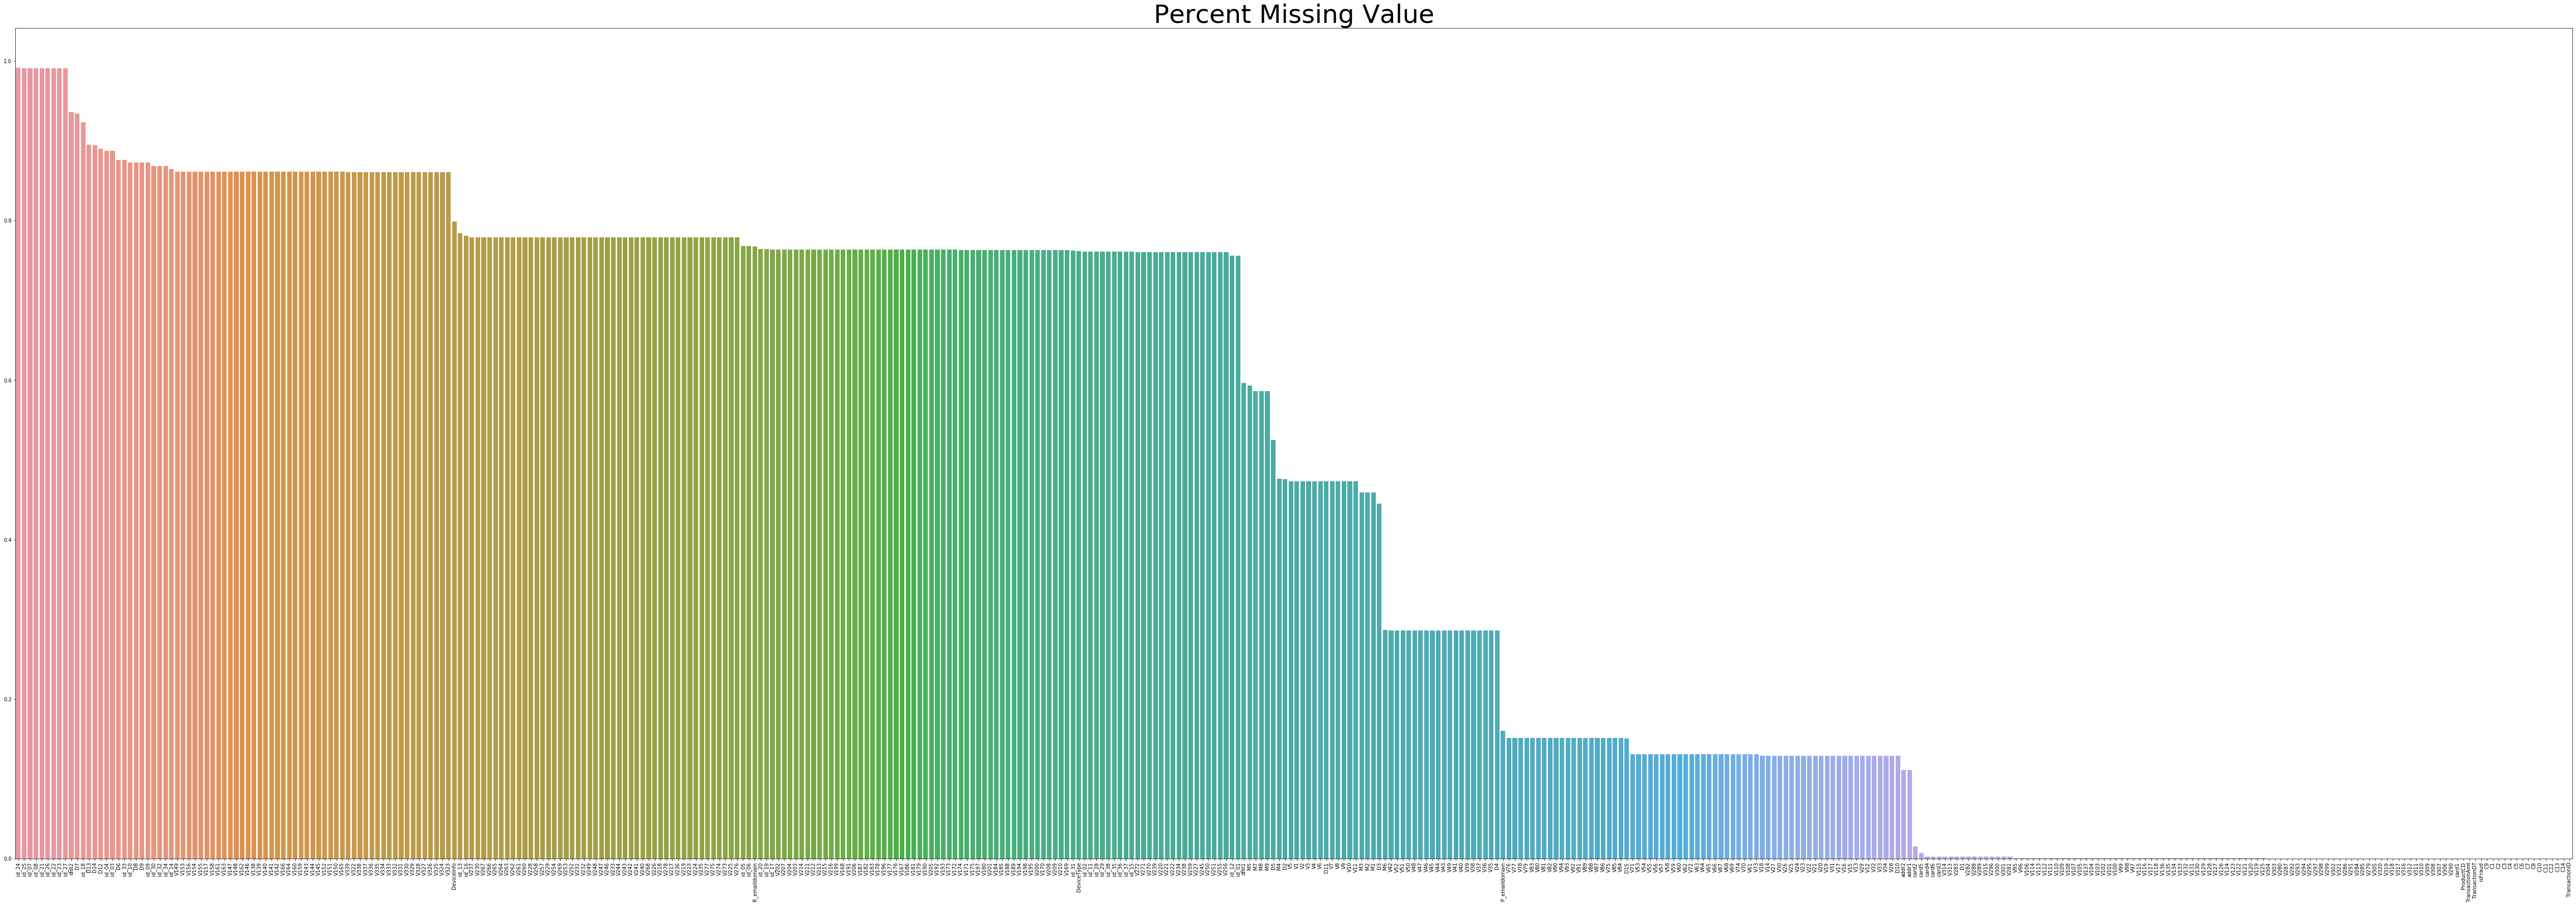

In [8]:
#plot
plt.figure(figsize=(90,30))
sns.barplot(y=full_df.isnull().sum().sort_values(ascending=False)/len(full_df), 
            x=full_df.isnull().sum().sort_values(ascending=False).index
           )
plt.title("Percent Missing Value",size=50)
plt.xticks(rotation=90)

In [9]:
x=full_df.isnull().sum().sort_values(ascending=False).index
x

Index(['id_24', 'id_25', 'id_07', 'id_08', 'id_21', 'id_26', 'id_22', 'id_23',
       'id_27', 'dist2',
       ...
       'C5', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14',
       'TransactionID'],
      dtype='object', length=434)

In [13]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            #Print current column type
            #print("******************************")
            #print("Column: ",col)
            #print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            result = (props[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True

            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        props[col] = props[col].astype(np.uint8)
                    elif mx < 65535:
                        props[col] = props[col].astype(np.uint16)
                    elif mx < 4294967295:
                        props[col] = props[col].astype(np.uint32)
                    else:
                        props[col] = props[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        props[col] = props[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        props[col] = props[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        props[col] = props[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        props[col] = props[col].astype(np.int64)    
            
            # Make float datatypes 32 bit
            else:
                props[col] = props[col].astype(np.float32)
            
            #Print new column type
            #print("dtype after: ",props[col].dtype)
            #print("******************************")
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [14]:
props, NAlist=reduce_mem_usage(full_df)

Memory usage of properties dataframe is : 1959.8762512207031  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  550.7928085327148  MB
This is  28.103448275862068 % of the initial size


In [15]:
df=full_df.drop(NAlist,axis=1,inplace=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

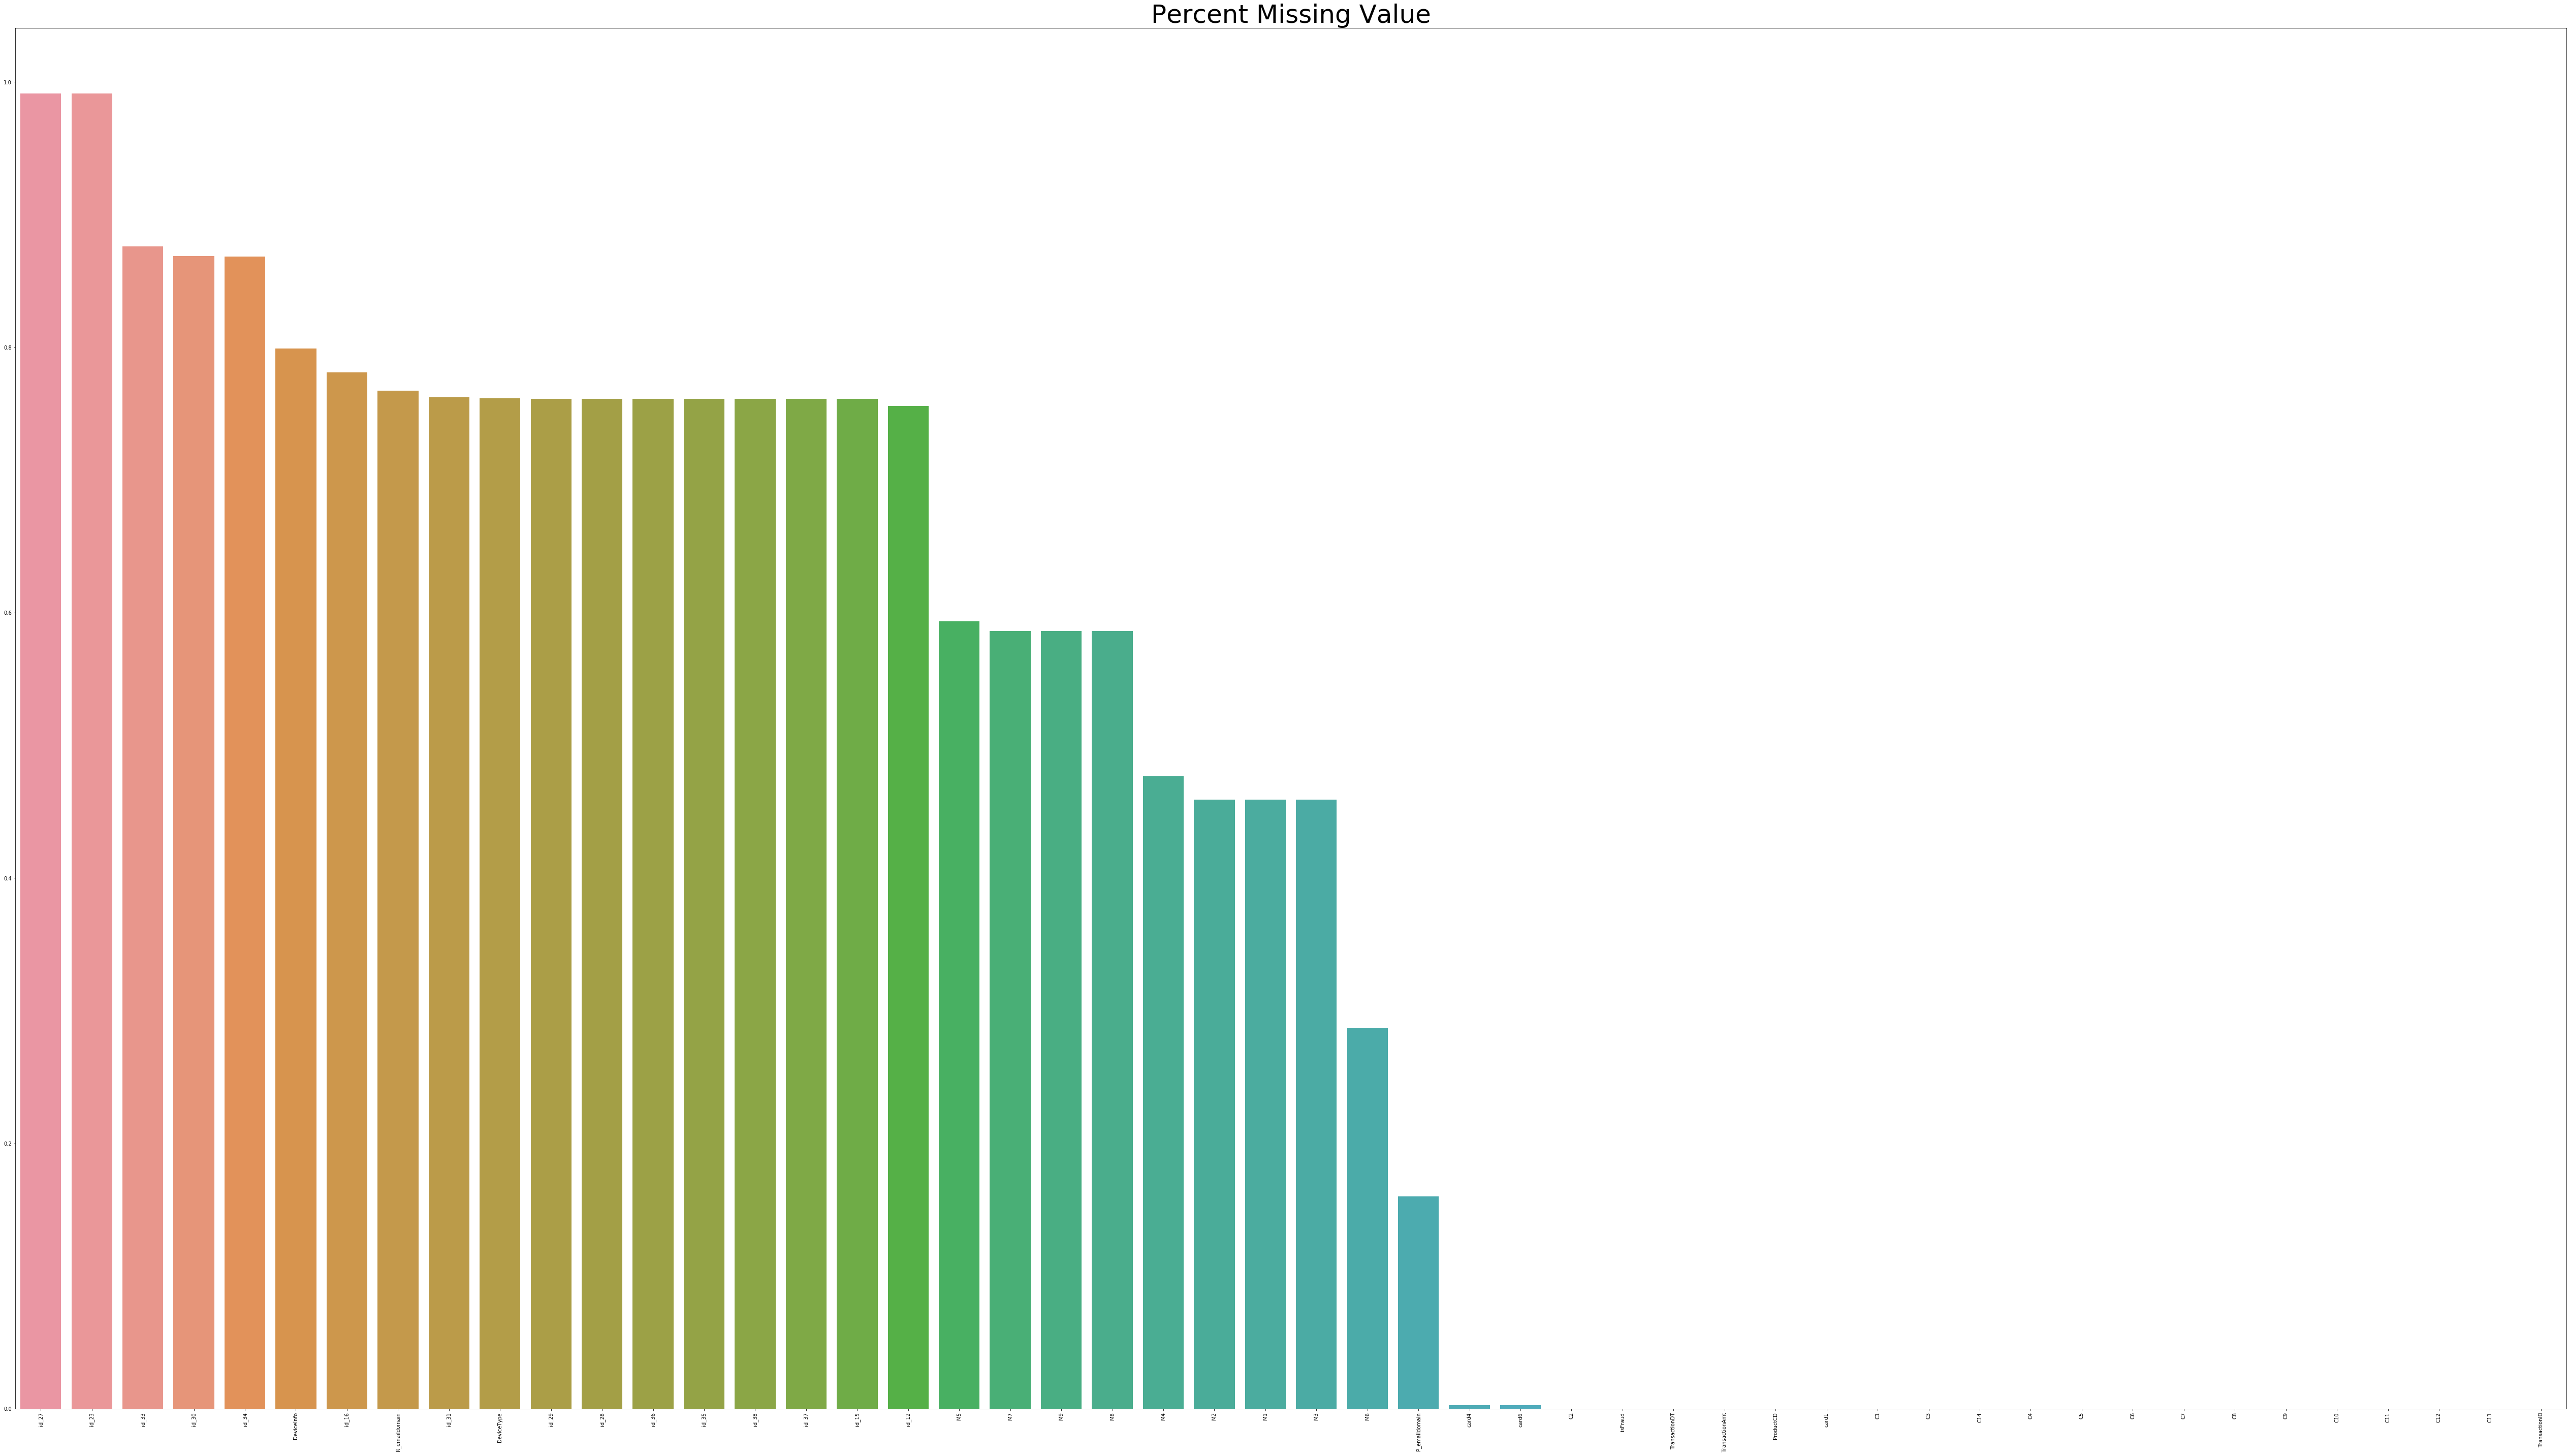

In [16]:
plt.figure(figsize=(90,50))
sns.barplot(y=df.isnull().sum().sort_values(ascending=False)/len(df), 
            x=df.isnull().sum().sort_values(ascending=False).index
           )

plt.title("Percent Missing Value",size=50)
plt.xticks(rotation=90)

In [37]:
#Create column of percent columns, #higher is worst

col_def=pd.DataFrame({"Na_count":df.isnull().sum().sort_values(ascending=False )})
col_def["per"]=(col_def["Na_count"]/len(df))
col_def

,Na_count,per
debit or credit,0,0.0
C6,0,0.0
isFraud,0,0.0
TransactionDT,0,0.0
TransactionAmt,0,0.0
card1,0,0.0
C1,0,0.0
C2,0,0.0
C3,0,0.0
C4,0,0.0


In [18]:
range=[0.05, 0.10 ,0.15, 0.25, 0.40, 0.60, 0.75]

for i in range:
    print(col_def[col_def["per"]<i].shape[0]/df.shape[1])

0.44
0.44
0.44
0.46
0.48
0.64
0.64


In [19]:
limit = 0.6

In [20]:
col_na = col_def[col_def["per"]<limit].index
col_na

Index(['M5', 'M7', 'M9', 'M8', 'M4', 'M2', 'M1', 'M3', 'M6', 'P_emaildomain',
       'card4', 'card6', 'C2', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'C1', 'C3', 'C14', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'TransactionID'],
      dtype='object')

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df[df.select_dtypes(include=["object"]).columns[:-10]]

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,...,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29
0,W,discover,credit,NaN,NaN,T,T,T,M2,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W,visa,debit,outlook.com,NaN,T,T,T,M0,F,...,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W,mastercard,debit,yahoo.com,NaN,NaN,NaN,NaN,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,H,mastercard,credit,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NotFound,New,NotFound,NaN,NaN,New,NotFound
5,W,visa,debit,gmail.com,NaN,T,T,T,M1,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,W,visa,debit,yahoo.com,NaN,T,T,T,M0,F,...,T,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,W,visa,debit,mail.com,NaN,NaN,NaN,NaN,M0,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,H,visa,debit,anonymous.com,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NotFound,New,NotFound,NaN,NaN,New,NotFound
9,W,mastercard,debit,yahoo.com,NaN,T,T,T,M0,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
card_dummy = pd.get_dummies(df["card6"])
card_dummy

,charge card,credit,debit,debit or credit
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0
5,0,0,1,0
6,0,0,1,0
7,0,0,1,0
8,0,0,1,0
9,0,0,1,0


In [24]:
df=pd.concat([df,card_dummy],axis=1)
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card4,card6,P_emaildomain,R_emaildomain,...,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,charge card,credit,debit,debit or credit
0,2987000,0,86400,68.5,W,13926,discover,credit,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
1,2987001,0,86401,29.0,W,2755,mastercard,credit,gmail.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0
2,2987002,0,86469,59.0,W,4663,visa,debit,outlook.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
3,2987003,0,86499,50.0,W,18132,mastercard,debit,yahoo.com,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0
4,2987004,0,86506,50.0,H,4497,mastercard,credit,gmail.com,NaN,...,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,0,1,0,0


In [25]:
df=df._get_numeric_data()
df=df.dropna()
df

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,C1,C2,C3,C4,C5,...,C9,C10,C11,C12,C13,C14,charge card,credit,debit,debit or credit
0,2987000,0,86400,68.500000,13926,1,1,0,0,0,...,1,0,2,0,1,1,0,1,0,0
1,2987001,0,86401,29.000000,2755,1,1,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2,2987002,0,86469,59.000000,4663,1,1,0,0,0,...,1,0,1,0,1,1,0,0,1,0
3,2987003,0,86499,50.000000,18132,2,5,0,0,0,...,1,0,1,0,25,1,0,0,1,0
4,2987004,0,86506,50.000000,4497,1,1,0,0,0,...,0,1,1,0,1,1,0,1,0,0
5,2987005,0,86510,49.000000,5937,1,1,0,0,0,...,1,0,1,0,1,1,0,0,1,0
6,2987006,0,86522,159.000000,12308,1,1,0,0,0,...,1,0,1,0,1,1,0,0,1,0
7,2987007,0,86529,422.500000,12695,1,1,0,0,0,...,0,0,1,0,1,1,0,0,1,0
8,2987008,0,86535,15.000000,2803,1,1,0,0,0,...,0,1,1,0,1,1,0,0,1,0
9,2987009,0,86536,117.000000,17399,2,2,0,0,0,...,3,0,1,0,12,2,0,0,1,0


In [26]:
x_df=df.drop(["isFraud"],axis=1)
y_df=df["isFraud"]

In [27]:
X_train,X_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.50)

In [28]:
from sklearn.linear_model import LogisticRegression  
from sklearn.preprocessing import StandardScaler  

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [29]:
lr = LogisticRegression(solver='lbfgs')  
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
lr.score(X_test, y_test)

0.9646933315270769

In [32]:
y_pred=lr.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,All
True,,
0,284845,284845
1,10425,10425
All,295270,295270
